Digit Recognition

In [4]:
!pip install mnist

In [5]:
import keras
import tensorflow
import mnist

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [7]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images  = mnist.test_images()
test_labels  = mnist.test_labels()


In [8]:
type(train_images)

numpy.ndarray

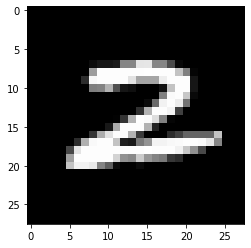

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
first_image = train_images[199]
plt.imshow(first_image,cmap="gray")
plt.show()

### What is the ratio b/w train and test data here?
  6/7 is training and 1/7 is testing

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
# Normalize the images

train_images = (train_images/255)
test_images = (test_images/255)

In [13]:
# Flatten the images

train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))

In [14]:
# Build the model

model = Sequential([
  Dense(64, activation='relu',input_shape = (784,)),
  Dense(64, activation= 'relu'),
  Dense(10, activation='softmax'),
])                    

In [15]:
# Compile the model

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics = ['accuracy']
)

In [16]:
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=7,
    batch_size=32
)

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2720 - accuracy: 0.9213
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1211 - accuracy: 0.9638
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0902 - accuracy: 0.9721
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0697 - accuracy: 0.9782
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0596 - accuracy: 0.9815
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0492 - accuracy: 0.9845
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0422 - accuracy: 0.9863


In [17]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
# Evaluate the model

model.evaluate(
    test_images,
    to_categorical(test_labels)
               )

313/313 [==============================] - 0s 906us/step - loss: 0.0979 - accuracy: 0.9730


[0.09794764965772629, 0.9729999899864197]

In [20]:
test_images[44].reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

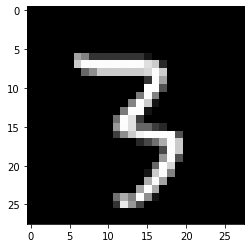

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = train_images[44]
plt.imshow(first_image.reshape((28,28)), cmap ='gray')
plt.show()

In [24]:
np.argmax(model.predict(test_images[44].reshape((-1,784))))

3

In [25]:
#Predict on the first 5 test images
predictions = model.predict(test_images[:5])

#Print the model's preductions.
print(np.argmax(predictions, axis=1))

#Check our predictions against the ground truths.
print(test_labels[:5])

[7 2 1 0 4]
[7 2 1 0 4]
